In [1]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
import pandas as pd
import numpy as np
import json
from ast import literal_eval
from tqdm import tqdm
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [6]:
data = []
with open('raw_data/steam_games.json','r') as f:
    d = f.readline()
    while d:
        data.append(literal_eval(d))
        d = f.readline()

In [7]:
df = pd.DataFrame(data)
df = df[~df['id'].isna()]
df = df[~df['app_name'].isna()]
df = df[~df['price'].isna()]
df = df[~df['genres'].isna()]
df = df[~df['tags'].isna()]

In [8]:
df['price'] = df['price'].apply(lambda x: x if type(x)==float else 0)

In [9]:
iid_map = {}
iid_rmap = {}
for idx in range(len(df)):
    iid_map[df.iloc[idx,2]] = df.iloc[idx,12]
    iid_rmap[df.iloc[idx,12]] = df.iloc[idx,2]

In [11]:
iid_rmap['286690']

'Metro 2033 Redux'

In [6]:
tags = set()
genres = set()
for idx in range(len(df)):
    tags |= set(df.iloc[idx,6])
    genres |= set(df.iloc[idx,1])

In [7]:
multi_tags = ['4 Player Local', 'Asynchronous Multiplayer','Co-op', 'Co-op Campaign', 'Multiplayer', 'PvP']
df.head(2)

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",0.00,False,643980,Secret Level SRL,Mostly Positive,NaN


In [8]:
def has_multi_tags(row):
    for t in multi_tags:
        if t in row['tags']:
            return True
    return False

In [9]:
multi_tagged_games = df[df.apply(has_multi_tags,axis=1)]
multi_tagged_games.head(3)

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",0.00,False,643980,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",0.00,False,670290,Poolians.com,Mostly Positive,NaN
27,Stainless Games Ltd,"[Action, Indie, Racing]",Carmageddon Max Pack,Carmageddon Max Pack,http://store.steampowered.com/app/282010/Carma...,1997-06-30,"[Racing, Action, Classic, Indie, Gore, 1990's,...",NaN,http://steamcommunity.com/app/282010/reviews/?...,"[Single-player, Multi-player, Steam Trading Ca...",9.99,False,282010,Stainless Games Ltd,Very Positive,NaN


In [10]:
data = []
with open('data/australian_users_items.json','r') as f:
    d = f.readline()
    idx = 0
    while d:
        data.append(literal_eval(d))
        d = f.readline()
        idx+=1
        if idx%200==0:
            print(idx)
print(data[2])

200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
5400
5600
5800
6000
6200
6400
6600
6800
7000
7200
7400
7600
7800
8000
8200
8400
8600
8800
9000
9200
9400
9600
9800
10000
10200
10400
10600
10800
11000
11200
11400
11600
11800
12000
12200
12400
12600
12800
13000
13200
13400
13600
13800
14000
14200
14400
14600
14800
15000
15200
15400
15600
15800
16000
16200
16400
16600
16800
17000
17200
17400
17600
17800
18000
18200
18400
18600
18800
19000
19200
19400
19600
19800
20000
20200
20400
20600
20800
21000
21200
21400
21600
21800
22000
22200
22400
22600
22800
23000
23200
23400
23600
23800
24000
24200
24400
24600
24800
25000
25200
25400
25600
25800
26000
26200
26400
26600
26800
27000
27200
27400
27600
27800
28000
28200
28400
28600
28800
29000
29200
29400
29600
29800
30000
30200
30400
30600
30800
31000
31200
31400
31600
31800
32000
32200
32400
32600
32800
33000
33200
33400
33600
33800
34000
34200
34400
34600
34800
35000
352

In [11]:
user_item_matrix = {}
item_user_matrix = {}
for d in tqdm(data):
    user_item_matrix[d['user_id']] = []
    for i in d['items']:
        l=(i['item_id'],i['playtime_forever'],i['playtime_2weeks'])
        user_item_matrix[d['steam_id']].append(l)

100%|██████████| 88310/88310 [00:02<00:00, 33062.52it/s]


In [28]:
user_item_playtime = []
for k,v in tqdm(user_item_matrix.items()):
    for i in v:
        user_item_playtime.append((k,i[0],i[1]))

100%|██████████| 87625/87625 [00:01<00:00, 64369.27it/s]


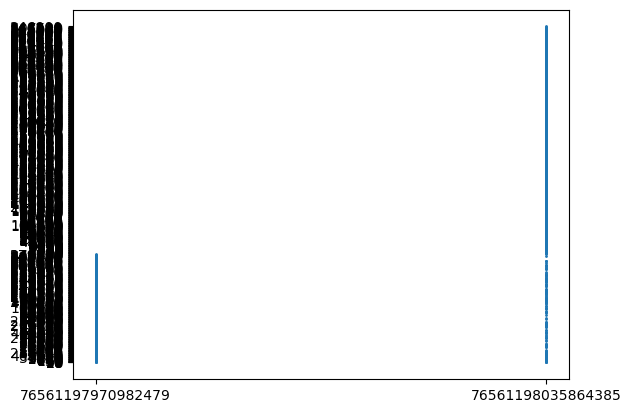

In [13]:
x = [i[0] for i in user_item_pair]
y = [i[1] for i in user_item_pair]
plt.scatter(x[:1000],y[:1000],s=1)

In [14]:
data = []
with open('data/australian_user_reviews.json','r') as f:
    d = f.readline()
    while d:
        d = literal_eval(d)
        for r in d['reviews']:
            data.append((d['user_id'],r['review'],r['recommend'],r['item_id']))
        d = f.readline()

In [15]:
reviews = pd.DataFrame(data,columns=['user_id','review','recommend','item_id'])
reviews

,user_id,review,recommend,item_id
0,76561197970982479,Simple yet with great replayability. In my opi...,True,1250
1,76561197970982479,It's unique and worth a playthrough.,True,22200
2,76561197970982479,Great atmosphere. The gunplay can be a bit chu...,True,43110
3,js41637,I know what you think when you see this title ...,True,251610
4,js41637,For a simple (it's actually not all that simpl...,True,227300
...,...,...,...,...
59300,76561198312638244,a must have classic from steam definitely wort...,True,70
59301,76561198312638244,this game is a perfect remake of the original ...,True,362890
59302,LydiaMorley,had so much fun plaing this and collecting res...,True,273110
59303,LydiaMorley,:D,True,730


In [16]:
def review_filter(row):
    if 'friend' in row['review'] and row['recommend']==True:
        return True
    return False

In [17]:
filterd_games = reviews[reviews.apply(review_filter,axis=1)]
for idx in range(len(filterd_games)):
    print(filterd_games.iloc[idx,1])

I know what you think when you see this title "Barbie Dreamhouse Party" but do not be intimidated by it's title, this is easily one of my GOTYs. You don't get any of that cliche game mechanics that all the latest games have, this is simply good core gameplay. Yes, you can't 360 noscope your friends, but what you can do is show them up with your bad ♥♥♥ dance moves and put them to shame as you show them what true fashion and color combinations are.I know this game says for kids but, this is easily for any age range and any age will have a blast playing this.8/8
At first, it looked to me that..."Wow, just another plain game... Minecraft Style I guess..."However, after playing it for almost 2 hours, I've realised that this game...Is nothing like Minecraft in terms on gaming content/adventure.If you've ever wished to get DayZ and want to get a first-hand experience of it, this game will be a great start!I do recommend that you guys play with a friend, and not Single Player (Just yet...)My 

In [18]:
reviews['item_id'].value_counts()

730       3759
440       3736
4000      1735
570       1562
218620    1137
          ... 
292390       1
350810       1
310850       1
231330       1
431510       1
Name: item_id, Length: 3682, dtype: int64

In [19]:
iid_rmap['440']

'Team Fortress 2'

In [29]:
user_item_playtime

[('76561197970982479', '10', 6),
 ('76561197970982479', '20', 0),
 ('76561197970982479', '30', 7),
 ('76561197970982479', '40', 0),
 ('76561197970982479', '50', 0),
 ('76561197970982479', '60', 0),
 ('76561197970982479', '70', 0),
 ('76561197970982479', '130', 0),
 ('76561197970982479', '300', 4733),
 ('76561197970982479', '240', 1853),
 ('76561197970982479', '3830', 333),
 ('76561197970982479', '2630', 75),
 ('76561197970982479', '3900', 338),
 ('76561197970982479', '34440', 0),
 ('76561197970982479', '3920', 2),
 ('76561197970982479', '6400', 286),
 ('76561197970982479', '6910', 2685),
 ('76561197970982479', '7670', 633),
 ('76561197970982479', '409710', 0),
 ('76561197970982479', '220', 696),
 ('76561197970982479', '320', 0),
 ('76561197970982479', '340', 37),
 ('76561197970982479', '360', 0),
 ('76561197970982479', '380', 168),
 ('76561197970982479', '400', 173),
 ('76561197970982479', '420', 323),
 ('76561197970982479', '9340', 692),
 ('76561197970982479', '228200', 0),
 ('7656119

In [78]:
raw_data = pd.DataFrame(user_item_playtime,columns=['user','item','playtime'])
raw_data

,user,item,playtime
0,76561197970982479,10,6
1,76561197970982479,20,0
2,76561197970982479,30,7
3,76561197970982479,40,0
4,76561197970982479,50,0
...,...,...,...
5094077,76561198329548331,346330,0
5094078,76561198329548331,373330,0
5094079,76561198329548331,388490,3
5094080,76561198329548331,521570,4


In [122]:
p2r_matrix = raw_data.groupby('item').agg({'playtime':['mean','std'],'user':['count']})
p2r_matrix_droped = p2r_matrix.dropna(axis=0)

In [105]:
not_played_games = p2r_matrix_droped[p2r_matrix_droped.loc[:,('playtime','std')]==0].index
not_played_games

Index(['10040', '1210', '12190', '12300', '12400', '12650', '15350', '202570',
       '206270', '207241',
       ...
       '523489', '527440', '527520', '528580', '529670', '530720', '71320',
       '7340', '8840', '94304'],
      dtype='object', name='item', length=589)

In [123]:
u_i_matrix = raw_data.groupby('user').agg({'playtime':['mean','std'],'user':['count']})
u_i_matrix_droped = u_i_matrix.dropna(axis=0)

In [116]:
not_playing_players = u_i_matrix_droped[u_i_matrix_droped.loc[:,('playtime','std')]==0].index
not_playing_players

Index(['76561197960464227', '76561197990054714', '76561197994197471',
       '76561197995429830', '76561197999354844', '76561198011617106',
       '76561198011702843', '76561198019780793', '76561198025297001',
       '76561198026814630',
       ...
       '76561198212423173', '76561198216264103', '76561198227800104',
       '76561198229032600', '76561198242444678', '76561198243441504',
       '76561198248835684', '76561198282291871', '76561198300659277',
       '76561198326700687'],
      dtype='object', name='user', length=545)

In [118]:
tbdeleted = []
for i in tqdm(range(len(raw_data))):
    if raw_data.iloc[i,1] in not_played_games:
        tbdeleted.append(i)
tbdeleted

100%|██████████| 5094082/5094082 [01:11<00:00, 71560.81it/s]


[980,
 1088,
 2496,
 3090,
 4976,
 5148,
 6558,
 6562,
 6566,
 6567,
 9396,
 11317,
 12518,
 12522,
 12526,
 12527,
 14944,
 18033,
 18037,
 18041,
 18042,
 19500,
 20119,
 21292,
 21296,
 21300,
 21301,
 22118,
 22122,
 22126,
 22127,
 24999,
 28983,
 28987,
 28991,
 28992,
 30295,
 30396,
 30586,
 30590,
 30594,
 30595,
 34830,
 34886,
 35322,
 37086,
 42868,
 42869,
 43057,
 43105,
 43201,
 43309,
 43417,
 46620,
 48089,
 50104,
 50624,
 53358,
 54245,
 54249,
 54253,
 54254,
 57717,
 57762,
 58581,
 64690,
 67269,
 67270,
 68289,
 70803,
 73930,
 74170,
 74287,
 74299,
 75226,
 77373,
 80251,
 81397,
 86329,
 91749,
 91771,
 91788,
 91887,
 91890,
 91904,
 97691,
 97695,
 97699,
 97700,
 98073,
 98077,
 98081,
 98082,
 98648,
 98833,
 98834,
 98835,
 98839,
 98840,
 98981,
 99017,
 99248,
 99488,
 99678,
 99862,
 99921,
 100014,
 100547,
 100601,
 100886,
 101016,
 101085,
 101156,
 101223,
 101226,
 101279,
 101337,
 101364,
 101463,
 101472,
 101551,
 101554,
 101688,
 101729,
 1

In [119]:
for i in tqdm(range(len(raw_data))):
    if raw_data.iloc[i,0] in not_playing_players:
        tbdeleted.append(i)
tbdeleted

100%|██████████| 5094082/5094082 [01:09<00:00, 73120.44it/s]


[980,
 1088,
 2496,
 3090,
 4976,
 5148,
 6558,
 6562,
 6566,
 6567,
 9396,
 11317,
 12518,
 12522,
 12526,
 12527,
 14944,
 18033,
 18037,
 18041,
 18042,
 19500,
 20119,
 21292,
 21296,
 21300,
 21301,
 22118,
 22122,
 22126,
 22127,
 24999,
 28983,
 28987,
 28991,
 28992,
 30295,
 30396,
 30586,
 30590,
 30594,
 30595,
 34830,
 34886,
 35322,
 37086,
 42868,
 42869,
 43057,
 43105,
 43201,
 43309,
 43417,
 46620,
 48089,
 50104,
 50624,
 53358,
 54245,
 54249,
 54253,
 54254,
 57717,
 57762,
 58581,
 64690,
 67269,
 67270,
 68289,
 70803,
 73930,
 74170,
 74287,
 74299,
 75226,
 77373,
 80251,
 81397,
 86329,
 91749,
 91771,
 91788,
 91887,
 91890,
 91904,
 97691,
 97695,
 97699,
 97700,
 98073,
 98077,
 98081,
 98082,
 98648,
 98833,
 98834,
 98835,
 98839,
 98840,
 98981,
 99017,
 99248,
 99488,
 99678,
 99862,
 99921,
 100014,
 100547,
 100601,
 100886,
 101016,
 101085,
 101156,
 101223,
 101226,
 101279,
 101337,
 101364,
 101463,
 101472,
 101551,
 101554,
 101688,
 101729,
 1

In [120]:
raw_data.drop(tbdeleted)

,user,item,playtime
0,76561197970982479,10,6
1,76561197970982479,20,0
2,76561197970982479,30,7
3,76561197970982479,40,0
4,76561197970982479,50,0
...,...,...,...
5094077,76561198329548331,346330,0
5094078,76561198329548331,373330,0
5094079,76561198329548331,388490,3
5094080,76561198329548331,521570,4


In [124]:
def playtime2rating(item_id, playtime):
    mean = p2r_matrix.loc[item_id,('playtime','mean')]
    std = p2r_matrix.loc[item_id,('playtime','std')]
    return (playtime - mean)/std

In [128]:
u_i_matrix_droped

playtime                user
                          mean           std count
user                                              
76561197960269200   713.437500   5185.360715   384
76561197960270504  1045.401914   3636.866357   209
76561197960270742  2643.916667  14952.764450    36
76561197960271609   668.366667   1565.145129    30
76561197960271888  2752.707317  21250.641661   123
...                        ...           ...   ...
76561198326700687     0.000000      0.000000   177
76561198327440472     0.250000      0.500000     4
76561198328421116   174.000000     42.720019     3
76561198328946162   323.333333    790.532900     6
76561198329548331   104.285714    253.009693     7

[67609 rows x 3 columns]

In [137]:
f1_data = raw_data[raw_data['item'].isin(p2r_matrix_droped[p2r_matrix_droped[('user','count')] > 100].index)]
f2_data = f1_data[f1_data['user'].isin(u_i_matrix_droped[u_i_matrix_droped[('user','count')]>5].index)]

In [136]:
f2_data

,user,item,playtime
0,76561197970982479,10,6
1,76561197970982479,20,0
2,76561197970982479,30,7
3,76561197970982479,40,0
4,76561197970982479,50,0
...,...,...,...
5094077,76561198329548331,346330,0
5094078,76561198329548331,373330,0
5094079,76561198329548331,388490,3
5094080,76561198329548331,521570,4


In [132]:
raw_data_filterd

,user,item,playtime
0,76561197970982479,10,6
1,76561197970982479,20,0
2,76561197970982479,30,7
3,76561197970982479,40,0
4,76561197970982479,50,0
...,...,...,...
5094077,76561198329548331,346330,0
5094078,76561198329548331,373330,0
5094079,76561198329548331,388490,3
5094080,76561198329548331,521570,4


In [127]:
to_rating_raw_data = raw_data.copy()
for i in tqdm(range(len(to_rating_raw_data))):
    to_rating_raw_data.iloc[i,2] = playtime2rating(to_rating_raw_data.iloc[i,1],to_rating_raw_data.iloc[i,2])

  0%|          | 827/5094082 [00:00<20:32, 4131.91it/s]C:\Users\user\AppData\Local\Temp\ipykernel_1972\3444885254.py:4: RuntimeWarning: invalid value encountered in scalar divide
  return (playtime - mean)/std
  3%|▎         | 131255/5094082 [00:31<19:36, 4216.76it/s]


KeyboardInterrupt: 

In [39]:
user_item_rating = pd.DataFrame(['user','item','rating'])

'Casey Powell Lacrosse 16'

In [146]:
reviews[reviews['recommend']==True]

,user_id,review,recommend,item_id
0,76561197970982479,Simple yet with great replayability. In my opi...,True,1250
1,76561197970982479,It's unique and worth a playthrough.,True,22200
2,76561197970982479,Great atmosphere. The gunplay can be a bit chu...,True,43110
3,js41637,I know what you think when you see this title ...,True,251610
4,js41637,For a simple (it's actually not all that simpl...,True,227300
...,...,...,...,...
59300,76561198312638244,a must have classic from steam definitely wort...,True,70
59301,76561198312638244,this game is a perfect remake of the original ...,True,362890
59302,LydiaMorley,had so much fun plaing this and collecting res...,True,273110
59303,LydiaMorley,:D,True,730
